In [3]:
import underworld as uw
import math
from underworld import function as fn
import glucifer
res=128
mesh = uw.mesh.FeMesh_Cartesian("Q1/DQ0", (res,res), (0.,0.), (1.,1.))
velocityField = uw.mesh.MeshVariable(mesh,2)
velocityField.data[:] = (0.,0.)

pressureField = uw.mesh.MeshVariable(mesh.subMesh,1)
pressureField.data[:] = 0.

# Freeslip bc's
IWalls = mesh.specialSets["MinI_VertexSet"] + mesh.specialSets["MaxI_VertexSet"]
JWalls = mesh.specialSets["MinJ_VertexSet"] + mesh.specialSets["MaxJ_VertexSet"]
freeslip = uw.conditions.DirichletCondition(velocityField, (IWalls, JWalls))
# We are going to make use of one of the existing analytic solutions so that we may easily
# obtain functions for a viscosity profile and forcing terms.
# Exact solution solCx with defaults
sol = fn.analytic.SolCx()
stokesSystem = uw.systems.Stokes(velocityField,pressureField,sol.fn_viscosity,sol.fn_bodyforce,conditions=[freeslip,])


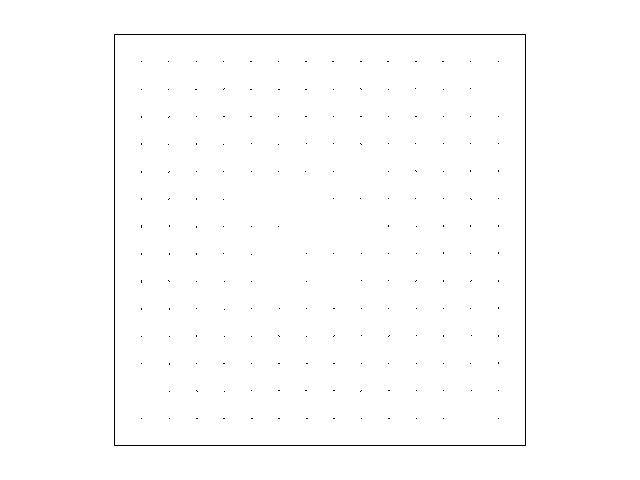

In [11]:
fig= glucifer.Figure()
fig.append( glucifer.objects.VectorArrows(mesh, sol.fn_velocity))

fig.show()
#fig.save_database('test.gldb')

In [9]:
sol.fn_velocity.evaluate(mesh)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -4.71437090e-04,   0.00000000e+00],
       [ -9.42442107e-04,   0.00000000e+00],
       ..., 
       [  7.35053091e-04,  -1.83259219e-18],
       [  3.67619768e-04,  -1.83398751e-18],
       [ -6.86866466e-19,  -1.83445269e-18]])